<a href="https://colab.research.google.com/github/meena25091992/Meenakshi-Hotel-Booking/blob/main/Hotel_Booking_Analysis_EDA(Capstone_Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Capestone_Projects/EDA_Project/'
hotel_df = pd.read_csv(working_directory + 'Hotel Bookings.csv')

In [ ]:
hotel_df.shape  # to get rows and columns in our dataframe

(119390, 32)

In [ ]:
hotel_df.info()      # to get information about the datatypes of each column and null values stored at each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.columns    # to fetch all columns in our dataframe

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.head()  # fetch first five rows from dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**In our dataframe, We have many columns which have null values and have duplicate data.So, we need to remove that data and clean our dataframe.**


# Data Cleaning

In [ ]:
# dropping unnecessary columns
hotel_df = hotel_df.drop(['arrival_date_year','company','agent','reservation_status_date'],axis=1)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
# check any duplicate rows or not 
duplicate_rows_df = hotel_df[hotel_df.duplicated()]
print(f"The number of duplicate rows is : {duplicate_rows_df.shape}")

The number of duplicate rows is : (32267, 28)


In [ ]:
# to count number of rows in each column
#hotel_df.count()

**Some rows have less data as compared to other rows.**

In [ ]:
# drop duplicate rows
hotel_df = hotel_df.drop_duplicates()
hotel_df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [ ]:
# Now use count method again to count no. of rows left  for each column after removing duplicate rows 
hotel_df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


**So,we have lot of duplicate data in our dataframe**

In [ ]:
# now finding null values in dataframe
print(hotel_df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

**So, there are 4 null values in children column and 451 null values in country column**

In [ ]:
# dropping the null values 
hotel_df = hotel_df.dropna()
hotel_df.count()

hotel                             86668
is_canceled                       86668
lead_time                         86668
arrival_date_month                86668
arrival_date_week_number          86668
arrival_date_day_of_month         86668
stays_in_weekend_nights           86668
stays_in_week_nights              86668
adults                            86668
children                          86668
babies                            86668
meal                              86668
country                           86668
market_segment                    86668
distribution_channel              86668
is_repeated_guest                 86668
previous_cancellations            86668
previous_bookings_not_canceled    86668
reserved_room_type                86668
assigned_room_type                86668
booking_changes                   86668
deposit_type                      86668
days_in_waiting_list              86668
customer_type                     86668
adr                               86668


**Null values are removed**

In [ ]:
# now check is their any null value left or not
print(hotel_df.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

**No null values are left**

In [ ]:
# Analysis the data by looking into various columns i.e. max. ,min., mean etc.
hotel_df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000
mean,0.273884,80.033623,26.839514,15.817741,1.007592,2.628883,1.878583,0.139452,0.010846,0.039346,0.030057,0.177263,0.272523,0.735727,106.604624,0.083710,0.700801
std,0.445953,85.990822,13.654389,8.834580,1.028408,2.041877,0.626190,0.457155,0.113670,0.194417,0.369813,1.720550,0.728841,9.891722,54.987661,0.280802,0.832121
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.550000,0.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Which hotel is preferred by most of the customers?

In [ ]:
# See which hotel is preferred most by plotting a graph
most_preferred_hotel = pd.DataFrame(hotel_df.hotel.value_counts().reset_index().values, columns=["hotel_name", "occurence"])

most_preferred_hotel

,hotel_name,occurence
0,City Hotel,53240
1,Resort Hotel,33428


**City hotel have more counts.So ,it have more number of bookings and preferred by most of the customers**


Text(0, 0.5, 'Total bookings')

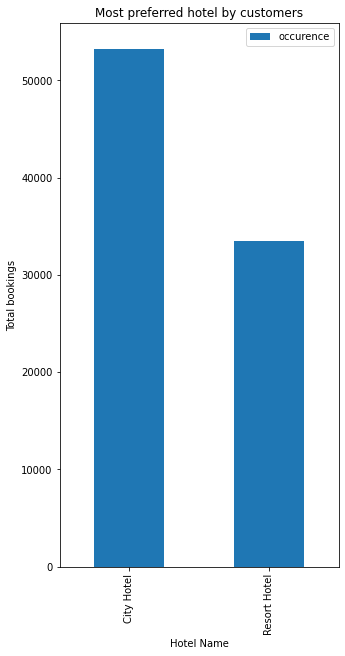

In [ ]:
# plot the graph
# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (5, 10)
most_preferred_hotel.plot(kind='bar',x='hotel_name')
plt.title('Most preferred hotel by customers')
#plt.plot(xticks=most_preferred_hotel.hotel_name)
plt.xlabel('Hotel Name')
plt.ylabel('Total bookings')

# When the best time of year to book a hotel room is?

In [ ]:
booking_hotel_df = hotel_df[['hotel','arrival_date_month']].value_counts().unstack()
booking_hotel_df = booking_hotel_df.transpose()


Text(0.5, 0, 'Month')

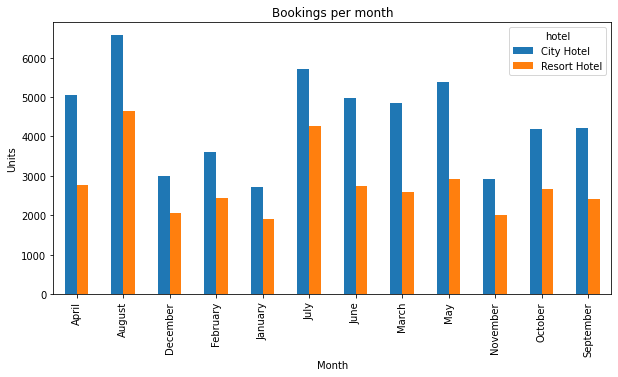

In [ ]:
# make graph
# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 5)
booking_hotel_df.plot(kind='bar')

plt.title('Bookings per month')
plt.ylabel('Units')
plt.xlabel('Month')



From the above graph,We have seen that: 

*   August have highest number of bookings for both hotels.So we can say that it seems to be the best time for booking 
*   Vice versa,We can also say that January have minimum no. of booking .So,it could also seems to be the best time for booking








# The optimal length of stay in order to get the best daily rate?

# Predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

# Which type of hotel is more likely to be cancelled?

**Below is the code to reperesent the proportion of cancelled and not cancelled bookings by pie chart**

In [ ]:
# code to find cancellation and not cancellation of booking for both hotels
cancel_vs_not_cancelled_df = hotel_df['is_canceled'].value_counts(normalize = True)
cancel_vs_not_cancelled_df

0    0.726116
1    0.273884
Name: is_canceled, dtype: float64

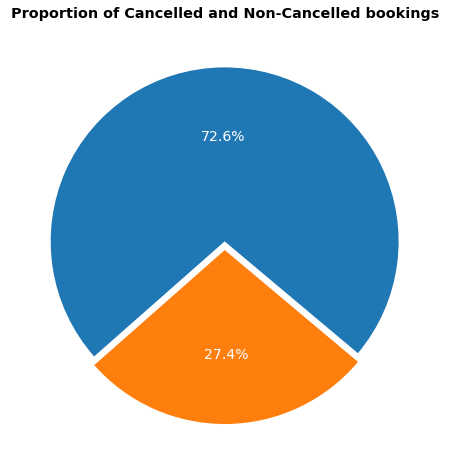

In [ ]:
# draw pie chart for canceled and non-canceled
explode = (0, 0.05)
plt.pie(cancel_vs_not_cancelled_df,labels=['Non-Cancelled','Cancelled'],startangle = 320,explode=explode, autopct='%1.1f%%' , textprops={'color':"w",'fontsize':14})
plt.title('Proportion of Cancelled and Non-Cancelled bookings', weight='bold')
plt.rcParams.update({'font.size': 12})


In [ ]:
# count cancle and non-cancel bookings

hotel_df.groupby('is_canceled')['hotel'].value_counts(normalize = True)


is_canceled  hotel       
0            City Hotel      0.593746
             Resort Hotel    0.406254
1            City Hotel      0.668787
             Resort Hotel    0.331213
Name: hotel, dtype: float64

Text(0.5, 0, 'Cancelation status')

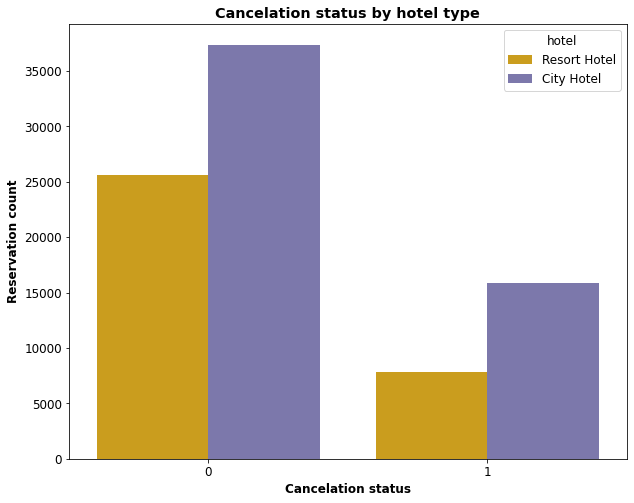

In [ ]:
# plot that bar graph for cancelled bookings by City Hotel and Resort Hotel
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(x= 'is_canceled',data = hotel_df,hue = 'hotel',palette= 'Dark2_r')

plt.title('Cancelation status by hotel type',weight='bold')
plt.ylabel('Reservation count', weight='bold')
plt.xlabel('Cancelation status',weight='bold')
# plt.rcParams.update({'font.size': 12})

**It has been observed from that graph that City Hotel have more cancellation than Resort *Hotel***

# What is the total number of bookings by Market Segment?

In [ ]:
hotel_df['market_segment'].value_counts(normalize=True)
                                               

Online TA        0.593310
Offline TA/TO    0.159298
Direct           0.134259
Groups           0.056134
Corporate        0.046326
Complementary    0.008054
Aviation         0.002619
Name: market_segment, dtype: float64

Text(0, 0.5, ' Segment Count')

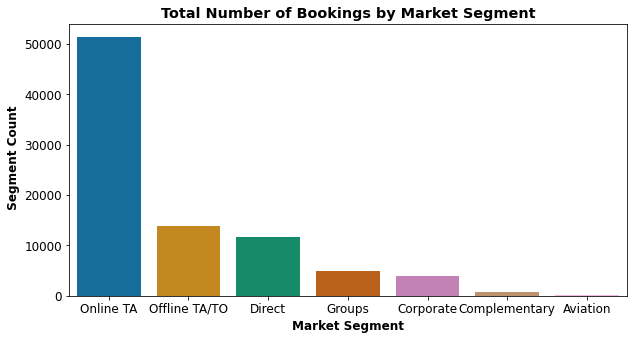

In [ ]:
# plot countplot graph of seaborn library
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x=hotel_df['market_segment'],order=pd.value_counts(hotel_df['market_segment']).index, palette='colorblind')
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment', weight='bold')
plt.ylabel(' Segment Count' , weight='bold')